In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
fish_data = pd.read_csv('/content/drive/My Drive/Datasets/Fish.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
fish_data=fish_data.drop('Species',axis=1)
fish_data


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
rows_to_drop = fish_data[
    (fish_data == 0).any(axis=1) |  #  zeros
    fish_data.isnull().any(axis=1) | #  NA/null values
    (fish_data < 0).any(axis=1)     #  negative values
]

print(rows_to_drop)

fish_data = fish_data.drop(rows_to_drop.index)



    Weight  Length1  Length2  Length3  Height   Width
40     0.0     19.0     20.5     22.8  6.4752  3.3516


In [5]:
from sklearn.preprocessing import StandardScaler
length_data = fish_data[['Length1', 'Length2', 'Length3']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(length_data)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_data)

In [7]:
print(pca.explained_variance_ratio_)


[0.99680187]


In [8]:
Y=fish_data['Weight']
fish_data=fish_data.drop(labels=['Weight','Length1','Length2','Length3'],axis=1)
fish_data

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340
...,...,...
154,2.0904,1.3936
155,2.4300,1.2690
156,2.2770,1.2558
157,2.8728,2.0672


In [9]:
fish_data=scaler.fit_transform(fish_data)
fish_data=pd.DataFrame(fish_data)
fish_data.columns=['Height','Width']
fish_data['Length']=principal_components
fish_data


,Height,Width,Length
0,0.591654,-0.240092,-0.408331
1,0.815870,-0.070461,-0.253720
2,0.792000,0.161475,-0.253675
3,0.874260,0.018572,0.139665
4,0.807462,0.421564,0.176110
...,...,...,...
153,-1.610713,-1.800030,-2.624291
154,-1.531396,-1.874035,-2.596937
155,-1.567130,-1.881876,-2.526449
156,-1.427976,-1.399948,-2.322917


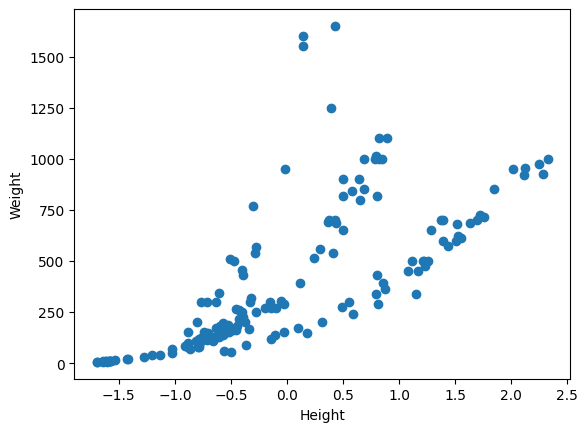

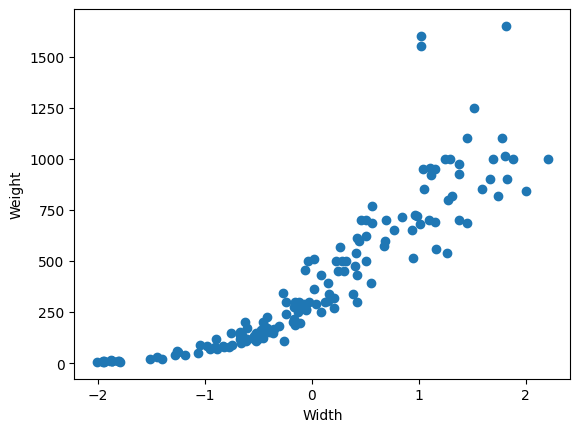

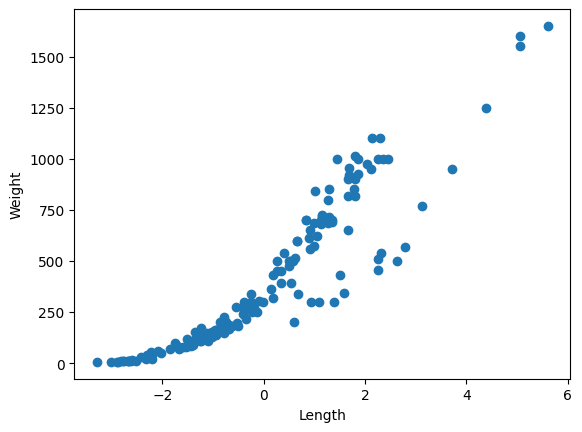

In [10]:
for i in fish_data.columns:
  plt.scatter(fish_data[i], Y)
  plt.xlabel(i)
  plt.ylabel('Weight')
  plt.show()

In [11]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
x = fish_data
x = np.array(x)
train_x, test_x, train_y, test_y = train_test_split(x, Y, test_size=0.21, random_state=4)


lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_x, train_y)
lasso_pred = lasso_reg.predict(test_x)

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(train_x, train_y)
ridge_pred = ridge_reg.predict(test_x)

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
y_pred = regr.predict(test_x)
y_pred
print("Lasso R-squared:", lasso_reg.score(test_x, test_y))
print("Ridge R-squared:", ridge_reg.score(test_x, test_y))
print("Original Linear Regression R-squared:", regr.score(test_x, test_y))


Lasso R-squared: 0.9090634749380585
Ridge R-squared: 0.9091458417579995
Original Linear Regression R-squared: 0.9091331707084995


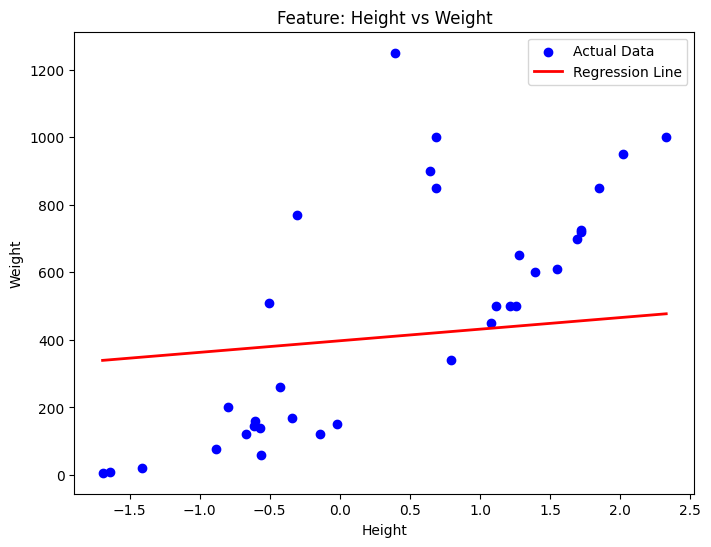

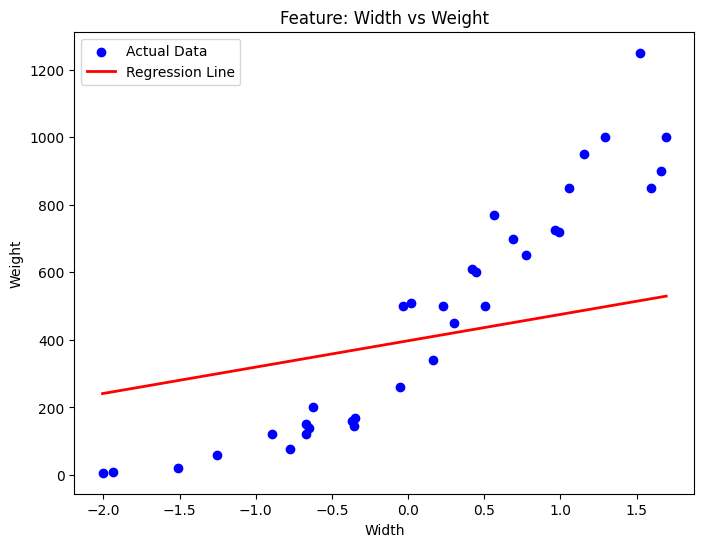

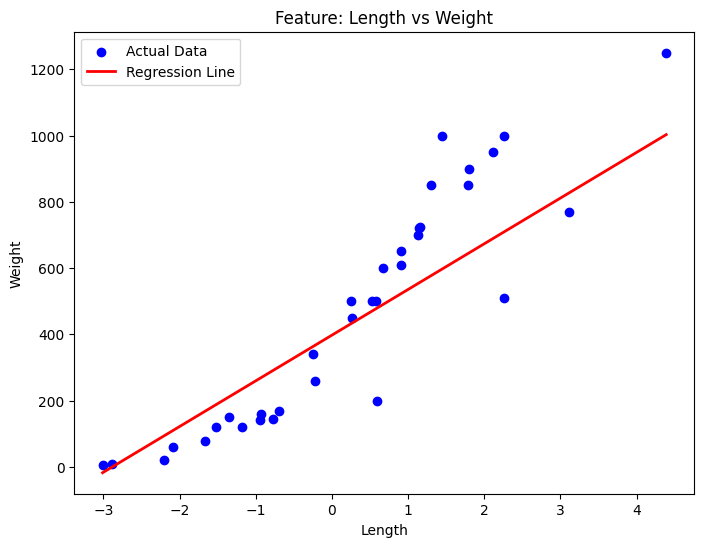

In [12]:
# Extract coefficients and intercept from the model
coefficients = regr.coef_
intercept = regr.intercept_

for i, feature in enumerate(fish_data.columns):
    plt.figure(figsize=(8, 6))

    # Scatter plot of the actual data
    plt.scatter(test_x[:, i], test_y, color="blue", label="Actual Data")

    # Generate values for the regression line
    x_vals = np.linspace(test_x[:, i].min(), test_x[:, i].max(), 100)
    y_vals = intercept + coefficients[i] * x_vals  # Regression formula for the feature

    plt.plot(x_vals, y_vals, color="red", linewidth=2, label="Regression Line")

    # Add labels and legend
    plt.title(f"Feature: {feature} vs Weight")
    plt.xlabel(feature)
    plt.ylabel("Weight")
    plt.legend()
    plt.show()


# Red Wine Quality Linear Regression


In [13]:
red_wine = pd.read_csv('/content/drive/My Drive/Datasets/red_wine_quality.csv')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
rows_to_drop = red_wine[
    (red_wine == 0).any(axis=1) |  #  zeros
    red_wine.isnull().any(axis=1) | #  NA/null values
    (red_wine < 0).any(axis=1)     #  negative values
]

print(rows_to_drop)

red_wine = red_wine.drop(rows_to_drop.index)



      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700          0.0             1.9      0.076   
1               7.8             0.880          0.0             2.6      0.098   
4               7.4             0.700          0.0             1.9      0.076   
5               7.4             0.660          0.0             1.8      0.075   
7               7.3             0.650          0.0             1.2      0.065   
...             ...               ...          ...             ...        ...   
1455            6.5             0.900          0.0             1.6      0.052   
1461            6.2             0.785          0.0             2.1      0.060   
1550            7.1             0.680          0.0             2.3      0.087   
1551            7.1             0.670          0.0             2.3      0.083   
1553            7.3             0.735          0.0             2.2      0.080   

      free sulfur dioxide  

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.235910     0.659544   
volatile acidity          -0.235910          1.000000    -0.523508   
citric acid                0.659544         -0.523508     1.000000   
residual sugar             0.101806          0.015014     0.130642   
chlorides                  0.086821          0.058346     0.215909   
free sulfur dioxide       -0.162788          0.018390    -0.078085   
total sulfur dioxide      -0.145235          0.138012    -0.021968   
density                    0.664556          0.043309     0.359880   
pH                        -0.668471          0.183158    -0.504997   
sulphates                  0.176856         -0.243178     0.308327   
alcohol                   -0.027226         -0.221833     0.142931   
quality                    0.123652         -0.377162     0.220484   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

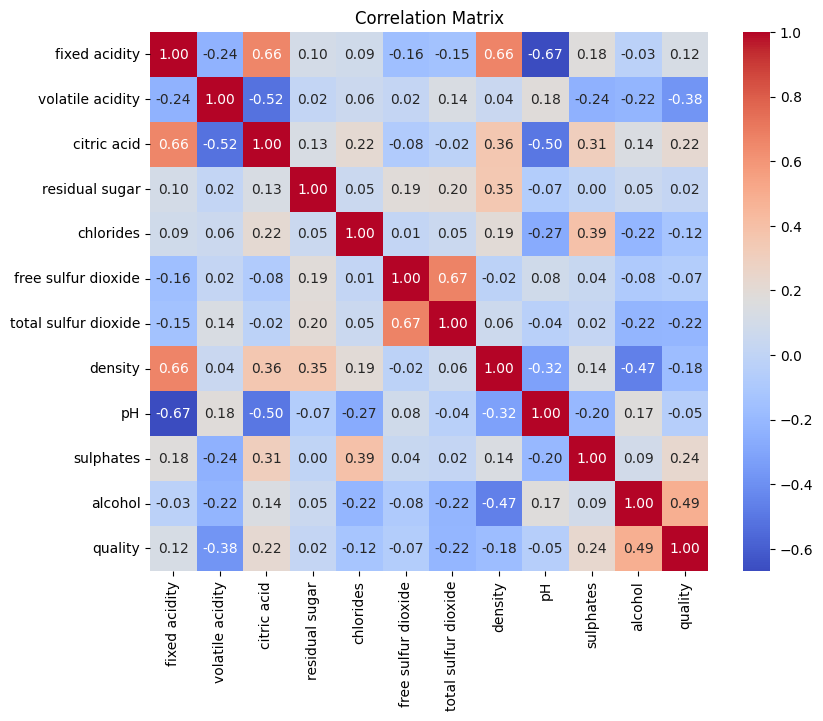

In [15]:
correlation_matrix = red_wine.corr()

print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [16]:
y=red_wine['quality']
red_wine=red_wine.drop(labels=['quality'],axis=1)
from sklearn.preprocessing import StandardScaler
red_wine=StandardScaler().fit_transform(red_wine)
red_wine=pd.DataFrame(red_wine)
red_wine.columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.365268,1.436799,-1.382139,-0.183426,0.086229,-0.088774,0.185590,0.095715,-0.255512,-0.075154,-0.582167
1,1.579527,-1.355739,1.432391,-0.459447,-0.265728,0.102884,0.364298,0.631485,-0.926899,-0.480913,-0.582167
2,-0.308068,0.505953,-1.273888,-0.666463,-0.389949,-0.088774,0.334514,-0.225746,0.013043,-1.176500,-0.962056
3,-0.365268,0.389597,-1.490390,-0.390442,-0.307135,-0.663749,-0.886656,-0.011439,0.415876,-0.538878,-0.867084
4,-0.536868,-0.075826,0.349879,2.438775,-0.348542,0.102884,1.615252,0.524331,0.348737,0.794330,0.082640
...,...,...,...,...,...,...,...,...,...,...,...
1462,-1.280466,0.505953,-1.165637,-0.390442,0.044822,1.540320,-0.112256,-1.029401,1.020124,-0.480913,0.082640
1463,-1.452066,0.215064,-1.057386,-0.252431,-0.534872,2.211124,0.096237,-0.911532,1.490096,0.562468,0.747446
1464,-1.223266,-0.017648,-0.895009,-0.183426,-0.245025,1.252833,-0.231394,-0.579355,0.818708,0.504502,0.557501
1465,-1.452066,0.767754,-0.949134,-0.390442,-0.265728,1.540320,-0.112256,-0.724013,1.825789,0.272640,-0.202277


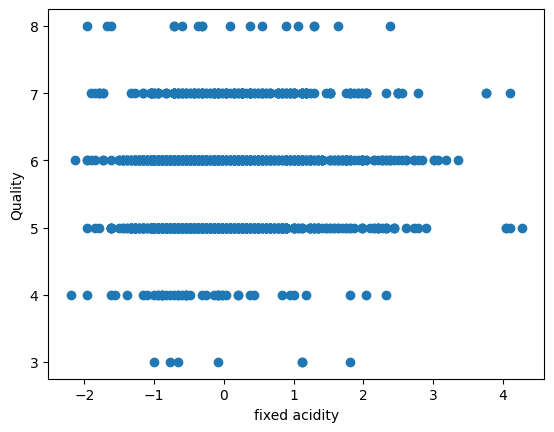

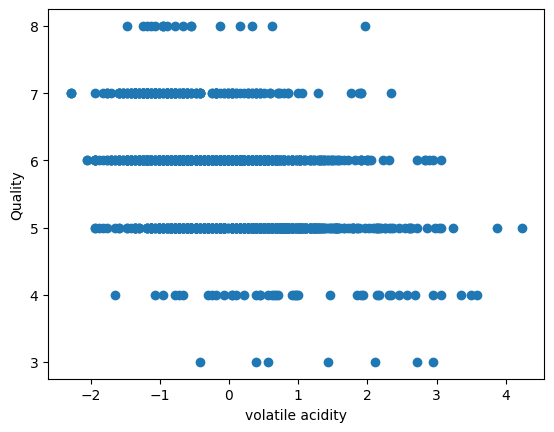

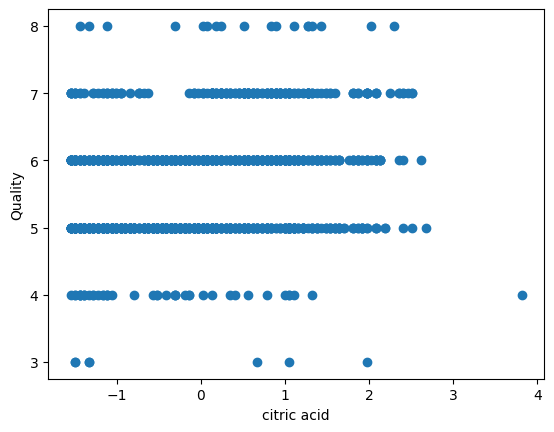

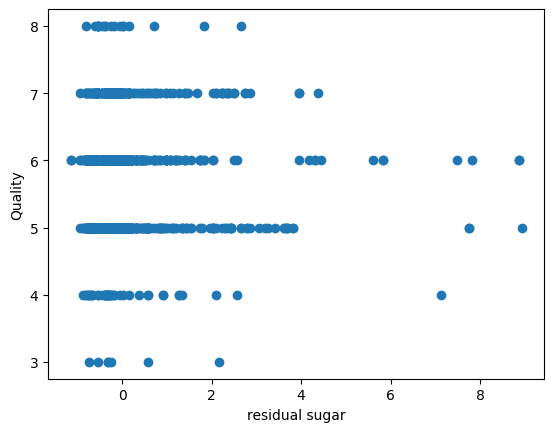

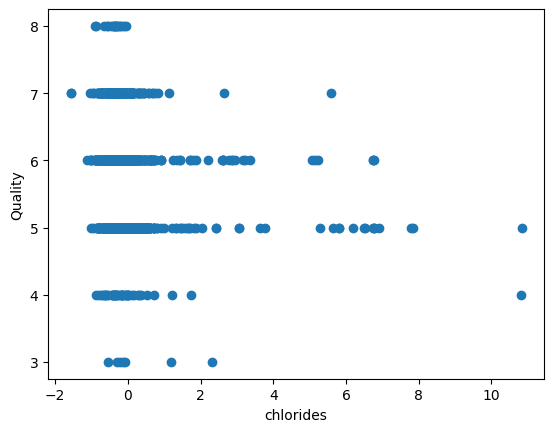

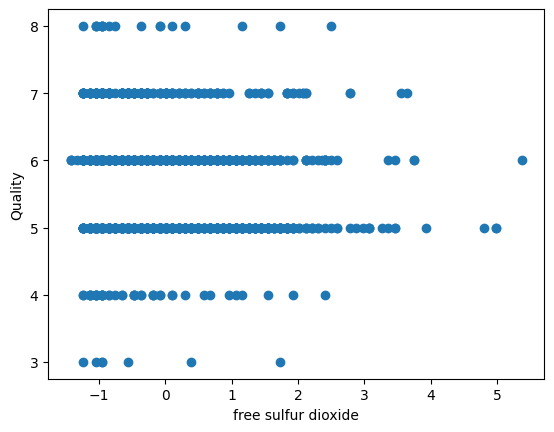

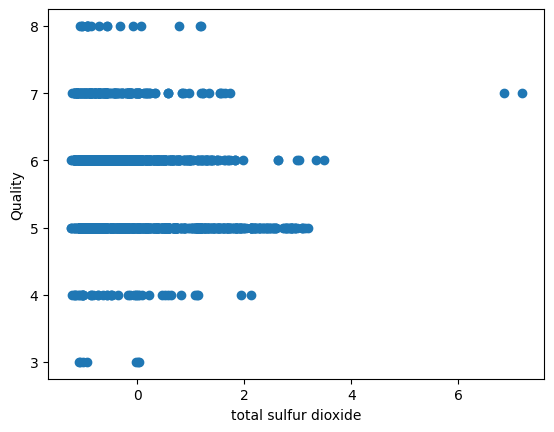

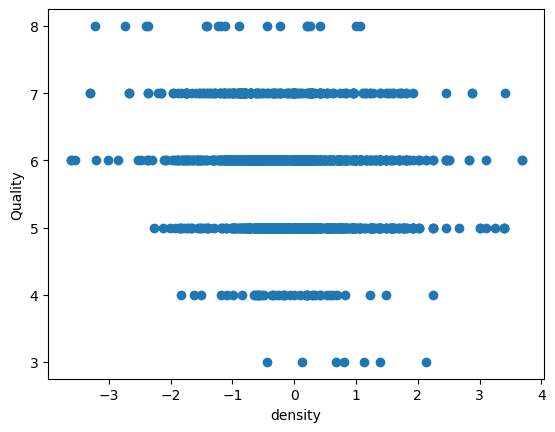

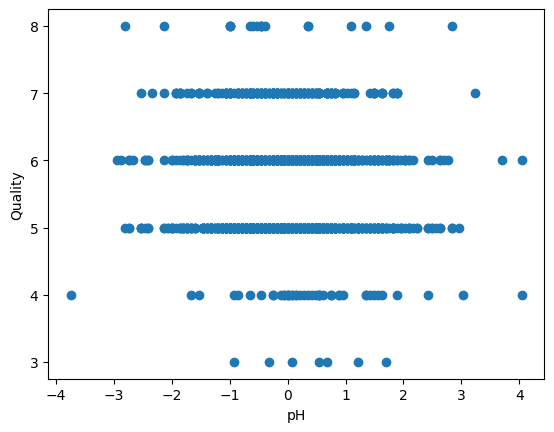

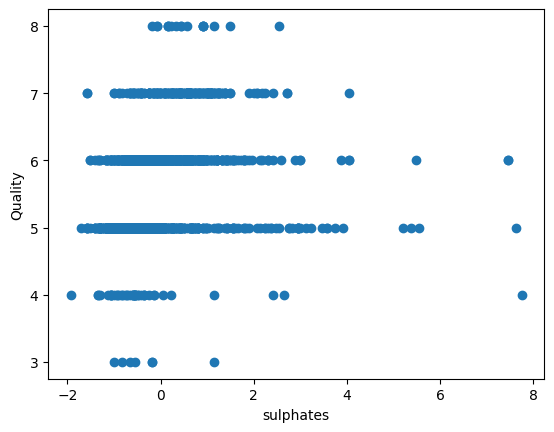

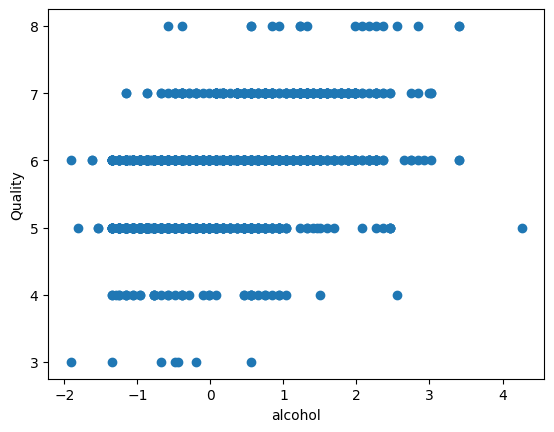

In [17]:
for i in red_wine.columns:
  plt.scatter(red_wine[i], y)
  plt.xlabel(i)
  plt.ylabel('Quality')
  plt.show()

In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = red_wine
X = np.array(X)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.001, random_state=4)


regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
y_pred = regr.predict(test_x)
y_pred
regr.score(test_x, test_y)


0.5349078662841865